# Unsupervised Learning (Cluster)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
ds = pd.read_csv("Mall_Customers.csv")
ds

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


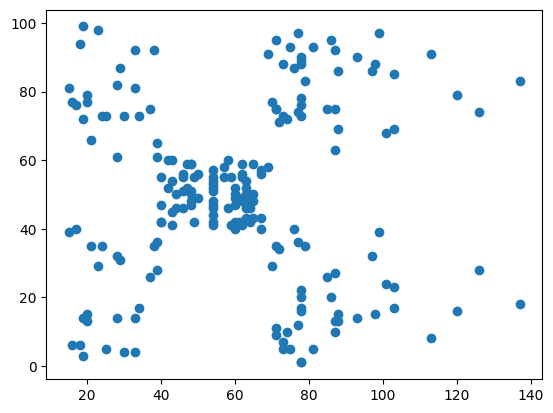

In [3]:
plt.scatter(ds["Annual Income (k$)"],ds["Spending Score (1-100)"])

In [4]:
# elbow method
# wcss(Within-Cluster Sum of Squares)
wcss = []
k_range = range(1,11)
for i in k_range:
    kmean = KMeans(n_clusters=i)
    kmean.fit_transform(ds)
    wcss.append(kmean.inertia_)

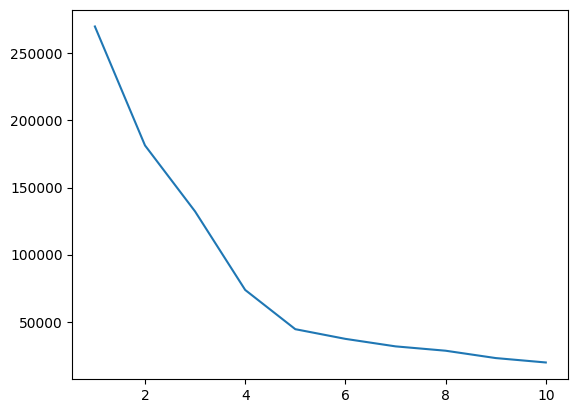

In [5]:
plt.plot(k_range,wcss)

In [6]:
kmean = KMeans(n_clusters=5)
kmean.fit(ds)

KMeans(n_clusters=5)

In [7]:
ds['cluster'] = kmean.labels_

In [8]:
ds

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


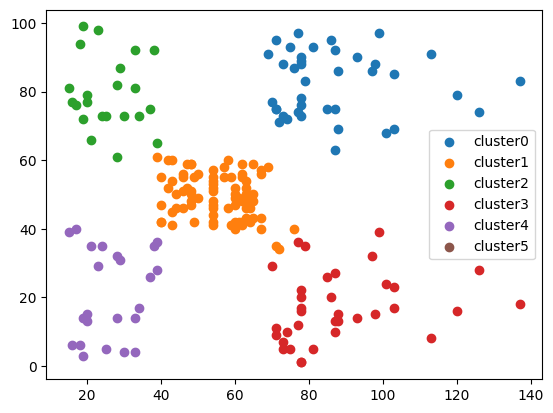

In [11]:
for i in range(6):
    plt.scatter(
        ds.loc[ds['cluster']==i,'Annual Income (k$)'],
        ds.loc[ds['cluster']==i,'Spending Score (1-100)'],
        label = f'cluster{i}'
    )
plt.legend()